In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [28]:
input_word = 'abcde'
w_to_id = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4}

x_train = [w_to_id['a'], w_to_id['b'], w_to_id['c'], w_to_id['d'],w_to_id['e']]
y_train = [w_to_id['b'], w_to_id['c'], w_to_id['d'], w_to_id['e'], w_to_id['a']]

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)


In [29]:
x_train = np.reshape(x_train, (len(x_train), 1,))
y_train = np.array(y_train)

---------------load model------------------
Epoch 1/100
1/1 [==============================] - 1s 656ms/step - loss: 0.2420 - sparse_categorical_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2404 - sparse_categorical_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2388 - sparse_categorical_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2372 - sparse_categorical_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2356 - sparse_categorical_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2340 - sparse_categorical_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2324 - sparse_categorical_accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2308 - sparse_categorical_accuracy: 1.0000
Epoch 9/100
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0913 - sparse_categorical_accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 998us/step - loss: 0.0897 - sparse_categorical_accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0881 - sparse_categorical_accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0866 - sparse_categorical_accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0851 - sparse_categorical_accuracy: 1.0000
Epoch 75/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0837 - sparse_categorical_accuracy: 1.0000
Epoch 76/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0823 - sparse_categorical_accuracy: 1.0000
Epoch 77/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0809 - sparse_categorical_accuracy: 1.0000
Epoch 78/100
1/1 [==============================] - 0s 972us/step - loss: 0

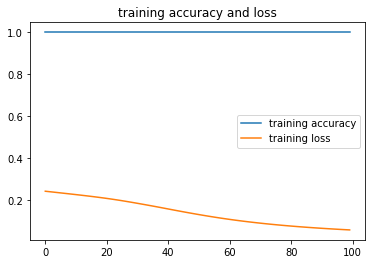

In [31]:
model = tf.keras.Sequential([
    Embedding(5, 2),
    SimpleRNN(3),
    Dense(5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

model_savepath = "./rnn_embedding_checkpoint/rnn_embedding_1pre1.ckpt"
if os.path.exists(model_savepath+'.index'):
    print('---------------load model------------------')
    model.load_weights(model_savepath)
    
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_savepath,
                                                save_weights_only=True,
                                                save_best_only=True,
                                                monitor='loss')

history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])

model.summary()

with open('rnn_embedding_1pre1_weights.txt', 'w') as f:
    for v in model.trainable_variables:
        f.write(str(v.name)+'\n')
        f.write(str(v.shape)+'\n')
        f.write(str(v.numpy())+'\n')

acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.plot(acc, label = 'training accuracy')
plt.plot(loss, label = 'training loss')
plt.title("training accuracy and loss")
plt.legend()
plt.show()

In [5]:
preNum = int(input('the number of test alphabet:'))
for i in range(preNum):
    alphabet1 = input('input testing alphabet:')
    alphabet = [w_to_id[alphabet1]]
    alphabet = np.reshape(alphabet,(1,1))
    result = model.predict(alphabet)
    pred = tf.argmax(result, axis=1)
    pred = int(pred)
    print(alphabet1 + "->" + input_word[pred])

the number of test alphabet:5
input testing alphabet:a
a->b
input testing alphabet:b
b->c
input testing alphabet:d
d->e
input testing alphabet:e
e->a
input testing alphabet:c
c->d


In [45]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding

In [58]:
input_word = 'abcdefghigklmnopqrstuvwxyz'
w_to_id = {j:i for i,j in enumerate(input_word)}

In [59]:
w_to_id

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 9,
 'h': 7,
 'i': 8,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [47]:
training_set_scaled = [i for i in range(len(input_word))]

In [48]:
x_train, y_train = [],[]

In [49]:
for i in range(4,26):
    x_train.append(training_set_scaled[i-4:i])
    y_train.append(training_set_scaled[i])

In [50]:
x_train

[[0, 1, 2, 3],
 [1, 2, 3, 4],
 [2, 3, 4, 5],
 [3, 4, 5, 6],
 [4, 5, 6, 7],
 [5, 6, 7, 8],
 [6, 7, 8, 9],
 [7, 8, 9, 10],
 [8, 9, 10, 11],
 [9, 10, 11, 12],
 [10, 11, 12, 13],
 [11, 12, 13, 14],
 [12, 13, 14, 15],
 [13, 14, 15, 16],
 [14, 15, 16, 17],
 [15, 16, 17, 18],
 [16, 17, 18, 19],
 [17, 18, 19, 20],
 [18, 19, 20, 21],
 [19, 20, 21, 22],
 [20, 21, 22, 23],
 [21, 22, 23, 24]]

In [51]:
# state = np.random.get_state()
# np.random.set_state(state)
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

In [52]:
x_train = np.reshape(x_train, (len(x_train),4))
y_train = np.array(y_train)

model = tf.keras.models.Sequential([
    Embedding(26, 2),
    SimpleRNN(10),
    Dense(26, activation='softmax')
])

In [53]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])
model_save_path = './rnn_embedding_4pre1_checkpoint/rnn_embedding_4pre1.ckpt'
if os.path.exists(model_save_path+'.index'):
    print('====================load model==========================')
    model.load_weights(model_save_path)
    
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path,
                                                save_weights_only=True,
                                                save_best_only=True,
                                                monitor='loss')

history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])
model.summary()

====================load model==========================
Epoch 1/100
1/1 [==============================] - 1s 644ms/step - loss: 0.1673 - sparse_categorical_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1632 - sparse_categorical_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1592 - sparse_categorical_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1553 - sparse_categorical_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1516 - sparse_categorical_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1480 - sparse_categorical_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1445 - sparse_categorical_accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1411 - sparse_categorical_accuracy: 1.0000
Epoch 9/100
1

1/1 [==============================] - 0s 2ms/step - loss: 0.0488 - sparse_categorical_accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0482 - sparse_categorical_accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0477 - sparse_categorical_accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0471 - sparse_categorical_accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 997us/step - loss: 0.0466 - sparse_categorical_accuracy: 1.0000
Epoch 75/100
1/1 [==============================] - 0s 998us/step - loss: 0.0460 - sparse_categorical_accuracy: 1.0000
Epoch 76/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0455 - sparse_categorical_accuracy: 1.0000
Epoch 77/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0450 - sparse_categorical_accuracy: 1.0000
Epoch 78/100
1/1 [==============================] - 0s 2ms/step - loss: 0

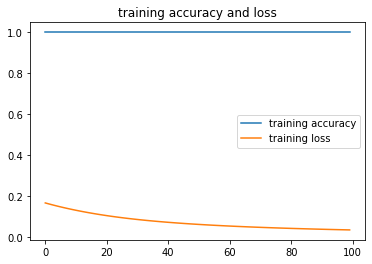

In [54]:
with open("./rnn_embedding_4pre1_weights.txt" ,'w') as f:
    for v in model.trainable_variables:
        f.write(str(v.name)+'\n')
        f.write(str(v.shape)+'\n')
        f.write(str(v.numpy())+'\n')

acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.plot(acc, label='training accuracy')
plt.plot(loss, label='training loss')
plt.title("training accuracy and loss")
plt.legend()
plt.show()

In [63]:
preNum = int(input("input the number of test alphabet:"))
for i in range(preNum):
    alphabet1 = input("input the test alphabet:")
    alphabet = [w_to_id[j] for j in alphabet1]
    
    alphabet = np.reshape(alphabet,(1,4))
    result = model.predict(alphabet)
    
    pred = int(tf.argmax(result, axis=1))
    print(alphabet1 + "->" + input_word[pred])

input the number of test alphabet:5
input the test alphabet:wxyz
wxyz->f
input the test alphabet:afsb
afsb->g
input the test alphabet:asaw
asaw->g
input the test alphabet:vsaw
vsaw->x
input the test alphabet:gawn
gawn->w
